**420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2022 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2022 Mikaël Swawola
<br/>
![Travaux Pratiques #1 - Fonction de cout](static/01-A1-banner.png)
<br/>
**Objectif:** cette séance de travaux pratique a pour objectif la compréhension des différents aspects de la **fonction de coût** en régression linéaire simple

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 0 - Chargement des bibliothèques

In [2]:
# Manipulation de données
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualisation de données
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

# Outils divers
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm

In [3]:
# Configuration de la visualisation
sns.set(style="darkgrid", rc={'figure.figsize':(11.7,8.27)})

### 1 - Simulation d'un jeu de données

In [4]:
m = 200

In [5]:
np.random.seed(2020) # Pour la reproductibilité des résultats
theta_0_th = -0.5
theta_1_th = 0.75
x = np.random.uniform(1,10,m)
y = theta_0_th + (theta_1_th * x) + np.random.randn(m)

Text(0, 0.5, 'y')

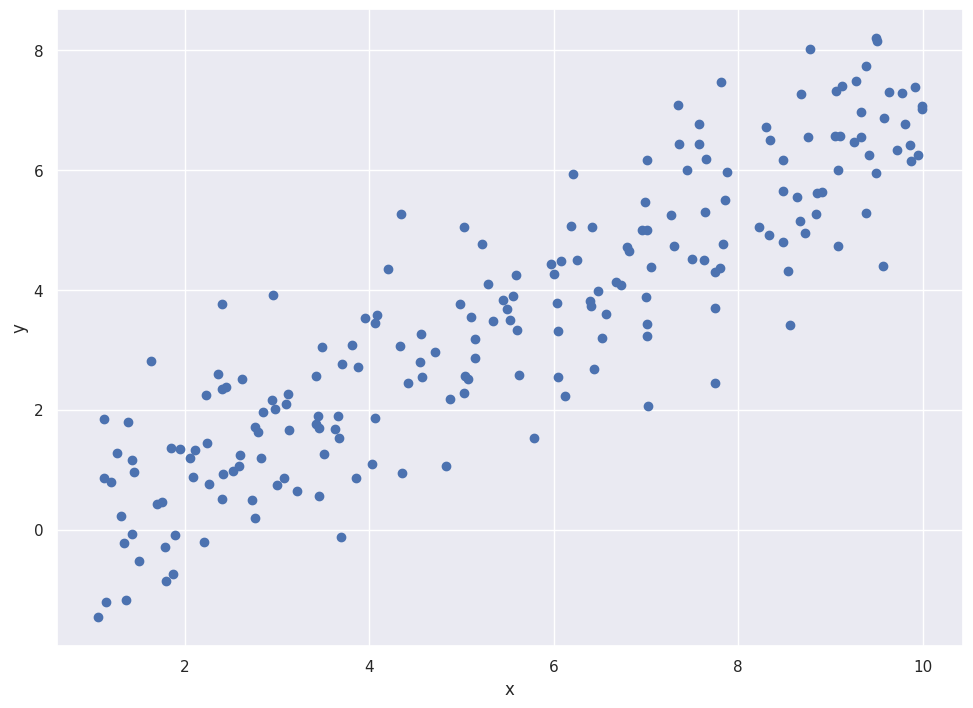

In [6]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")

### 2 - Définition d'un modèle de régression linéaire simple

**Exercice 1**: compléter la fonction ci-dessous représentant le modèle de régression linéaire simple (hypothèse)

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Pour rappel, le modèle de régression linéaire simple est
$h_{\theta}(x)=\theta_{0} + \theta_{1}x$
</p>

In [7]:
def hypothesis(x, theta_0, theta_1):
    # Compléter le code ci-dessous ~ 1 ligne
    h = theta_0 + theta_1 * x
    return h

### 3 - Règlage des paramètres de manière manuelle

**Exercice 2**: Faites varier les paramètres $\theta_0$ et $\theta_1$ de manière à obtenir un bon "fit" sur les données simulées

Text(0, 0.5, 'y')

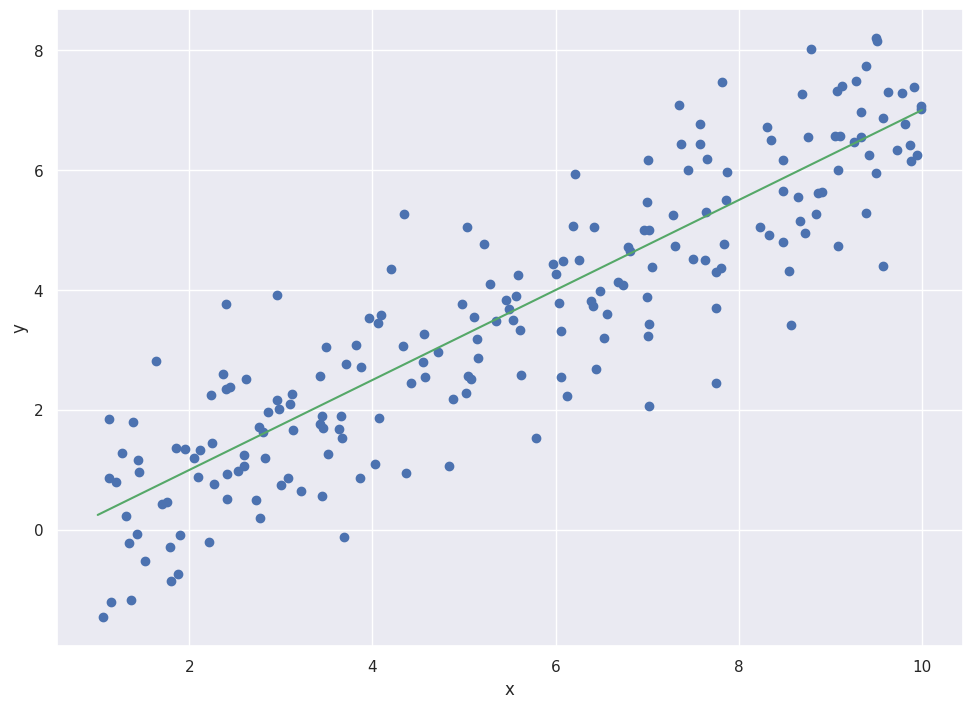

In [8]:
theta_0 = -0.5
theta_1 = 0.75

reg_x = np.linspace(1,10,10)
reg_y = hypothesis(np.linspace(1,10,10), theta_0, theta_1)
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(reg_x, reg_y, color="g")
ax.set_xlabel("x")
ax.set_ylabel("y")

### 4 - Définition de la fonction de coût

**Exercice 3**: Compléter la fonction de coût ci-dessous

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Pour rappel, la fonction de coût en régression linéaire simple s'exprime sous la forme
$J(\theta_{0},\theta_{1})= \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$
</p>

In [10]:
def cost_function(x,y, theta_0, theta_1):
    assert len(x) == len(y)
    # Compléter le code ci dessous ~ 1-4 lignes
    m = len(x)
    error = hypothesis(x, theta_0, theta_1) - y
    squared_error = error**2
    sse = np.sum(squared_error)
    cost = (1/(2*m))*sse
    
    return cost

Pour l'illustration suivante, nous fixerons $\theta_0$ à 0 et ferons varier $\theta_1$ sur un interval donné

Le modèle (ou l'hypothèse) sera donc $h_{\theta}(x) = \theta_{1}x$

In [11]:
thetas = np.linspace(-1,2,20)
J = []
theta_0 = 0
for theta_1 in thetas:
    J.append(cost_function(x, y, theta_0, theta_1))

**Exercice 4**: selon la courbe ci-dessus, quelle est approximativement la valeur de $\theta_1$ qui minimise la fonction de coût ?

<span style="color: green">Réponse: $\theta_1 \sim  0.7$</span>

Text(0, 0.5, 'Coût')

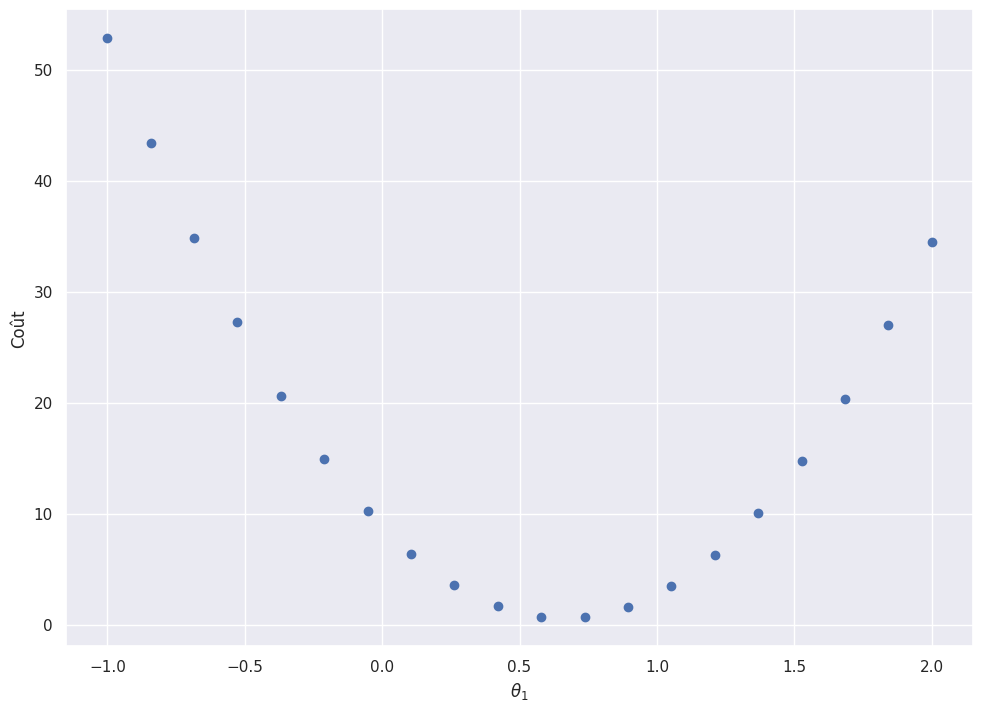

In [12]:
fig, ax = plt.subplots()
ax.scatter(thetas, J)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel("Coût")

### 5 - Modèle complet

$h_{\theta}(x) = \theta_{0} + \theta_{1}x$

In [13]:
theta_0s = np.linspace(-4,2,50)
theta_1s = np.linspace(-1,2,50)
mesh = np.zeros((50,50))
for i, theta0 in enumerate(theta_0s):
    for j, theta1 in enumerate(theta_1s):
        mesh[i,j] = cost_function(x, y, theta0, theta1)

**Exercice 5**: selon la courbe ci-dessus, quelle sont approximativement les valeurs de $\theta_{0}$ et $\theta_{1}$ qui minimisent la fonction de coût ?

<span style="color: green">Réponse: $\theta_0 \sim -0.5$ et $\theta_1 \sim 0.75$</span>

Text(0, 0.5, '$\\theta_1$')

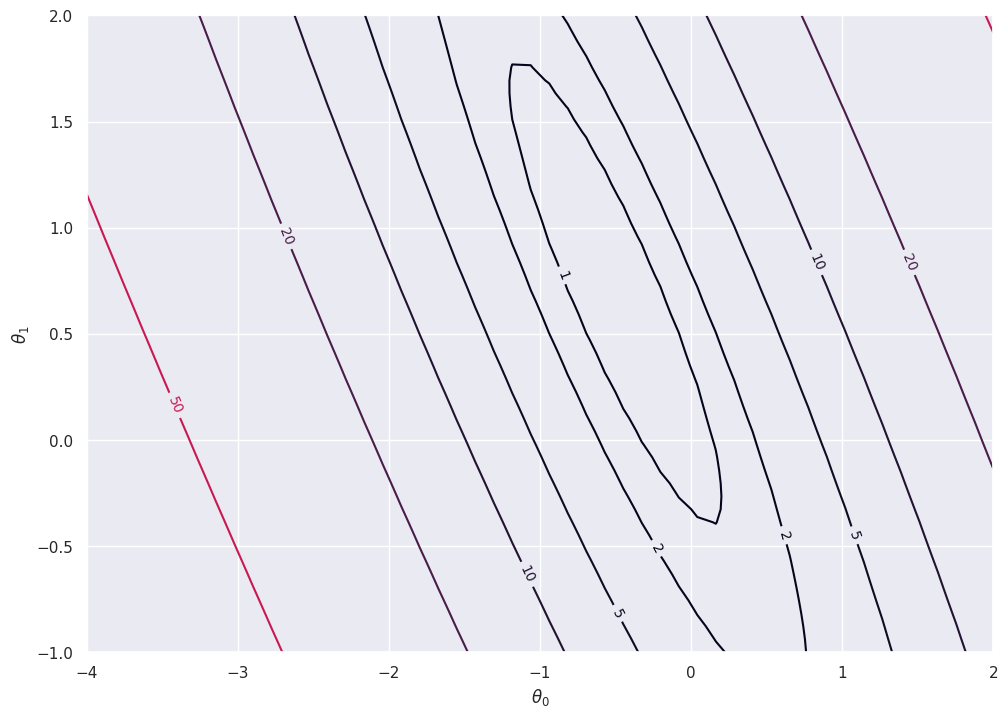

In [14]:
fig, ax = plt.subplots()
XX, YY = np.meshgrid(theta_0s,theta_1s)
CS = ax.contour(XX, YY, mesh, levels = [1,2,5,10,20,50,100])
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

Text(0.5, 0, 'J')

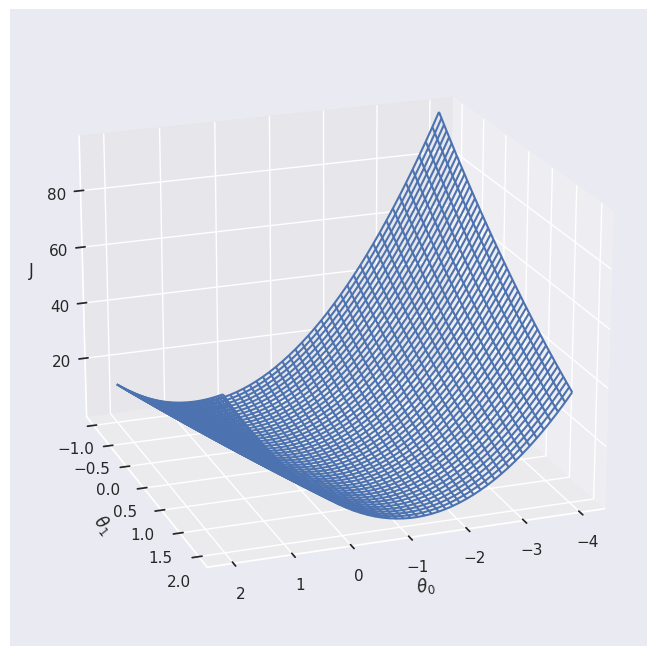

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 70)
ax.plot_wireframe(XX, YY, mesh, rstride=1, cstride=1)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('J')

### 6 - Jeu de données advertising 

In [16]:
import pandas as pd

**Exercice 6**: à l'aide de la bibiothèques *pandas*, lire le fichier `advertising-univariate.csv`

In [17]:
# Compléter le code ci-dessous ~ 1 ligne
df = pd.read_csv('../../data/advertising-univariate.csv', usecols=['TV','sales'])

#### 6-1 - Préparation de la structure de données

In [18]:
x = df['TV'].values
y = df['sales'].values
x = x/100 # Cette mise à l'échelle permet un meilleur affichage des résultats

#### 6-2 - Affichage des données

Text(0, 0.5, "Ventes (en millier d'unités)")

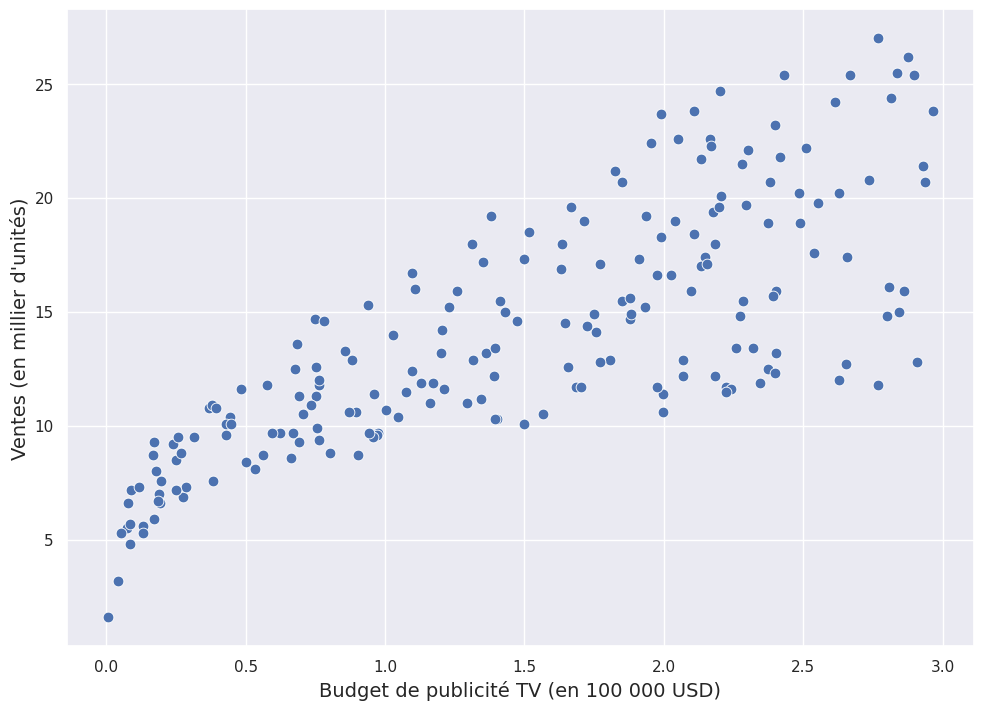

In [19]:
ax = sns.scatterplot(x=x, y=y, s=60)
ax.set_xlabel("Budget de publicité TV (en 100 000 USD)", fontsize=14)
ax.set_ylabel("Ventes (en millier d'unités)", fontsize=14)

**Exercice 7**: Faites varier les paramètres $\theta_{0}$ et $\theta_{1}$ de manière à obtenir un bon "fit" sur le jeu de données

Text(0, 25, 'J=5.257745326399999')

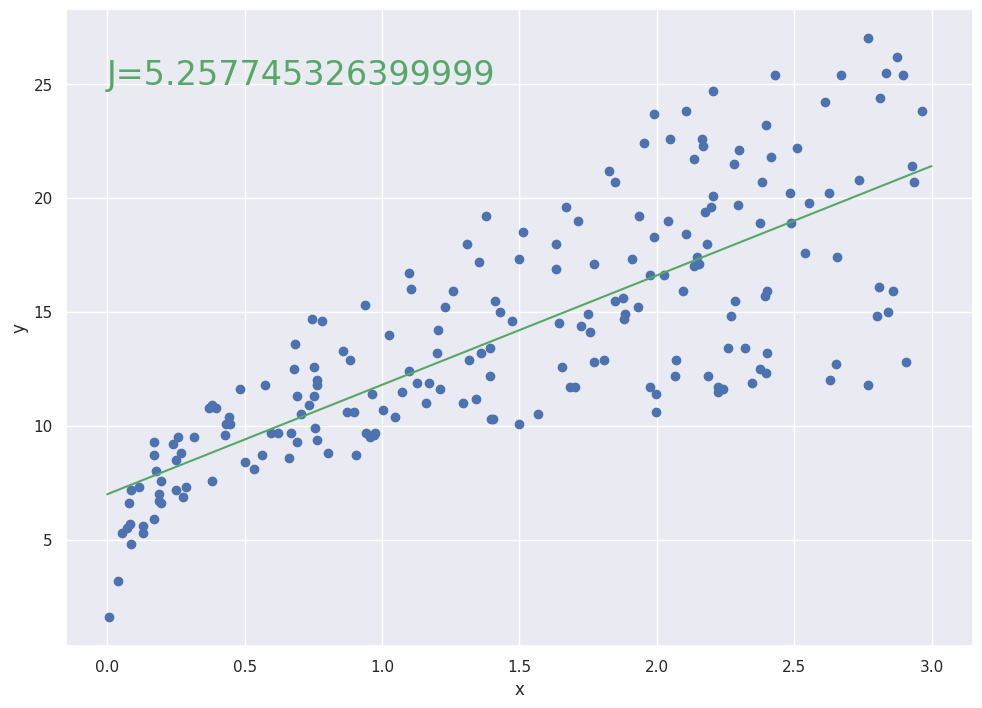

In [25]:
theta_0 = 7
theta_1 = 4.8

reg_x = np.linspace(0,3,10)
reg_y = hypothesis(np.linspace(0,3,10), theta_0, theta_1)
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(reg_x, reg_y, color="g")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Calcul de la perte
J = cost_function(x,y, theta_0, theta_1)

ax.text(0,25,f'J={J}', color='g', fontsize=24)

#### 6-3 Modèle simplifié

**Exercice 8**: En utlisant le modèle simplifié ($\theta_0$ = 0), quelle est approximativement la valeur de $\theta_1$ qui minimise la fonction de coût ? Pourquoi la valeur semble différente de celle trouvée précédemment ?

Note: le modèle (ou l'hypothèse) sera donc $h_{\theta}(x) = \theta_{1}x$

In [26]:
thetas = np.linspace(7,12,20)
J = []
theta_0 = 0
for theta_1 in thetas:
    J.append(cost_function(x, y, theta_0, theta_1))

Text(0, 0.5, '$J(\\theta_1)$')

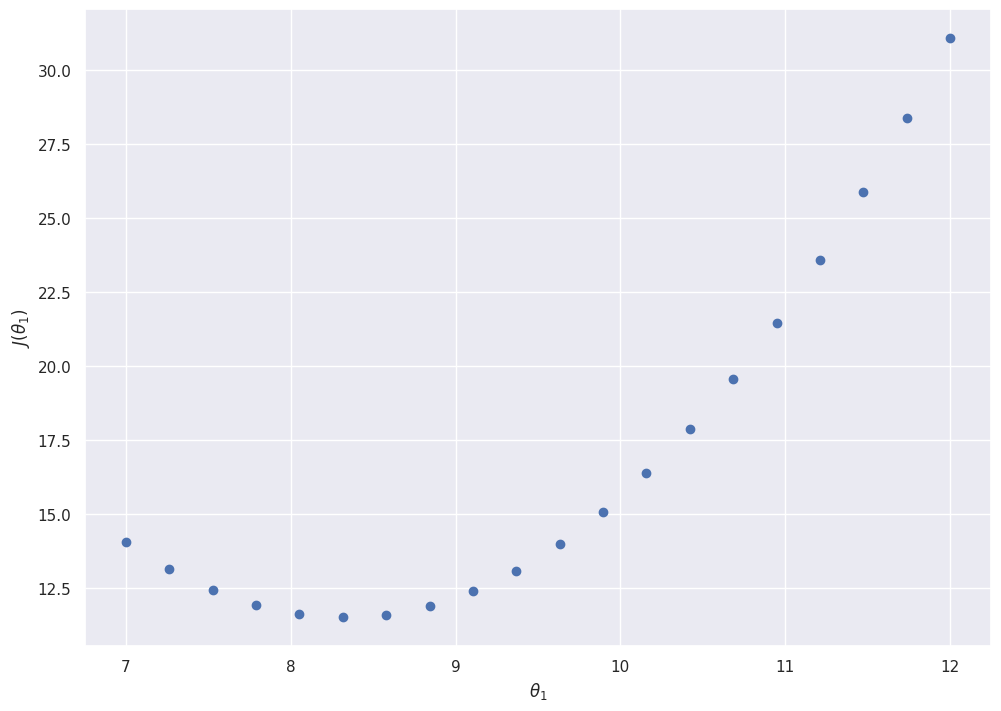

In [27]:
fig, ax = plt.subplots()
ax.scatter(thetas, J)
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$J(\theta_1)$")

#### 6-3 Modèle complet

$h_{\theta}(x) = \theta_{0} + \theta_{1}x$

**Exercice 9**: selon la courbe ci-dessus, quelle sont approximativement les valeurs de $\theta_{0}$ et $\theta_{1}$ qui minimisent la fonction de coût ?

In [28]:
theta_0s = np.linspace(4,9,50)
theta_1s = np.linspace(4.5,5.5,50)
mesh = np.zeros((50,50))
for i, theta_0 in enumerate(theta_0s):
    for j, theta_1 in enumerate(theta_1s):
        mesh[j,i] = cost_function(x, y, theta_0, theta_1)

Text(0, 0.5, '$\\theta_1$')

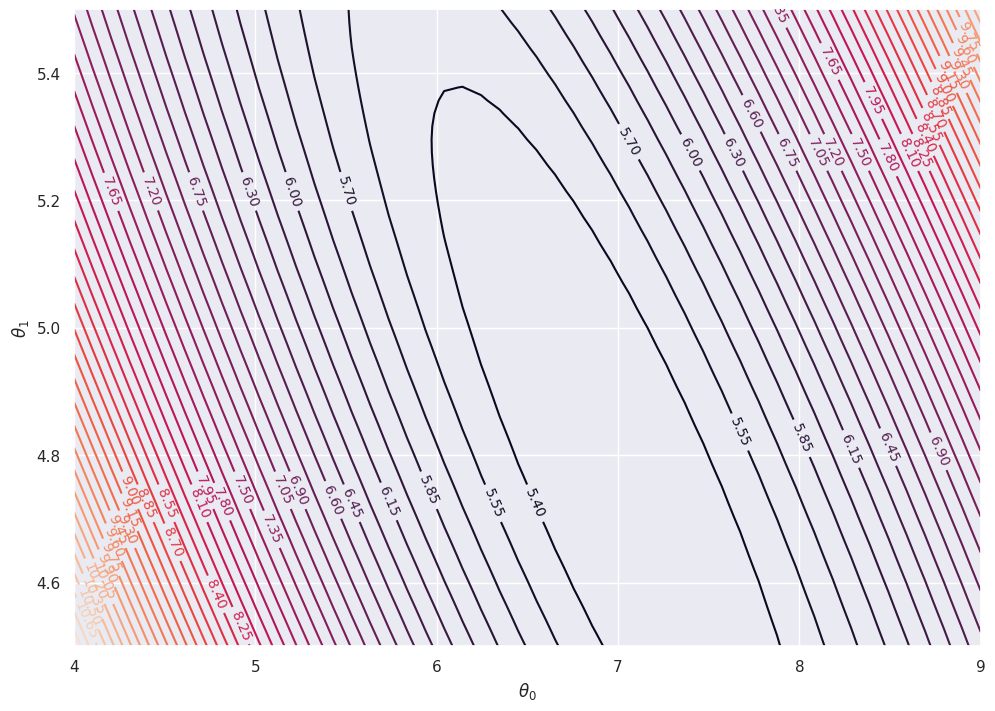

In [29]:
fig, ax = plt.subplots()
XX, YY = np.meshgrid(theta_0s,theta_1s)
CS = ax.contour(XX, YY, mesh, levels=40)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")

### Fin du TP